###### Dataset: PFA

## Task 1: Machine Learning - Clustering

##### Task: Use any clustering technique to extract patterns or segregate data into groups.

- User Story: User should be able to provide a data point (a row) and program should be able to identifyto which cluster given data point belongs to and why?

- Hint: Clustering


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### step 1: Load and PReProcess the Data

In [ ]:
#Load the train file
data = pd.read_excel('/content/train.xlsx')

In [ ]:
#Disply the top 5 rows
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [ ]:
#load the test file
X_test = pd.read_excel('/content/test.xlsx')

In [ ]:
X_test.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [ ]:
data.shape

(36752, 19)

In [ ]:

### Step 2: Standerize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 2: Standardize the data
X = data[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18']]


In [ ]:
##Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.47321406,  0.39508167, -0.17481688, ..., -1.03062689,
         0.28899656, -0.98195758],
       [-1.27438905, -1.06322685, -0.78798229, ...,  0.10784997,
         1.28186418,  0.33869147],
       [ 1.47249662,  2.97516597,  1.17414703, ...,  0.39246918,
        -0.20743726, -0.98195758],
       ...,
       [ 2.73148589,  0.7316144 , -0.91061537, ..., -0.55626153,
        -0.90244459, -0.69896135],
       [ 1.81585733,  1.62903503, -0.6653492 , ..., -0.93575382,
        -0.60458431, -1.35928588],
       [-0.01539979,  0.05854893, -0.6653492 , ...,  0.29759611,
        -0.10815049,  0.15002732]])

In [ ]:
## APply the K-means Clustering
from sklearn.cluster import KMeans

In [ ]:
### Elbow methods to select the  k-value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,init = 'k-means++')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[661536.0000000016,
 487176.6602455067,
 408283.37816264096,
 359933.4467093592,
 336329.8744975912,
 317420.7012093046,
 304080.8301890553,
 293996.62761905766,
 281647.0429910999,
 273692.58234304725]

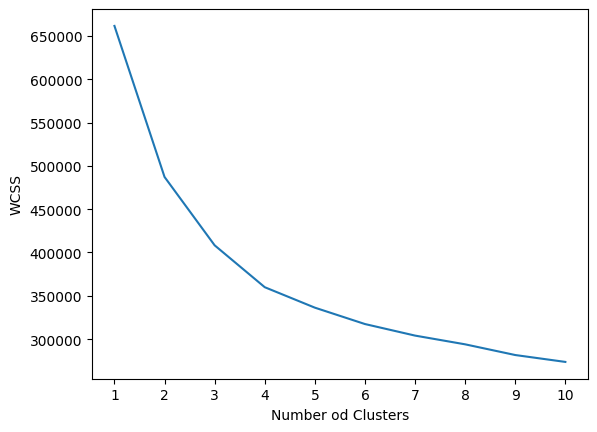

In [ ]:
## Now we plot the elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number od Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
## LEt's take the k = 2

In [ ]:
kmeans = KMeans(n_clusters = 2,init = 'k-means++')
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [ ]:
data['Cluster'] = kmeans.labels_

In [ ]:
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target,Cluster
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37,0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61,1
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19,0
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22,0
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33,0


- **Now,from the  X_test Take the Datapoint and predict the cluster**

In [ ]:
X_test.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57


In [ ]:
##Step 4 :Identify the Cluster for the new data point
new_data_point = X_test.iloc[0]
new_data_point = new_data_point.values.reshape(1,-1) # Reshape and assign back to the variable
scaled_new_data_point = scaler.transform(new_data_point)
predicted_cluster = kmeans.predict(scaled_new_data_point)
print(f'The new data point belongs to cluster {predicted_cluster[0]}')

The new data point belongs to cluster 1


In [ ]:
# Step 5: Explain Why
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 0.57497186,  0.60932545,  0.4146825 ,  0.28839579, -0.14653757,
        -0.22796408, -0.61172716, -0.69683175, -0.63060302,  0.57182411,
         0.56908981,  0.51424706,  0.19651841, -0.50924447, -0.4662701 ,
        -0.61226033, -0.67548747, -0.71440754],
       [-0.53908159, -0.57129079, -0.38879764, -0.27039386,  0.13739056,
         0.21373435,  0.57354259,  0.65333487,  0.5912402 , -0.53613032,
        -0.5335667 , -0.48214729, -0.18425155,  0.47745696,  0.43716509,
         0.57404248,  0.63332292,  0.66981357]])

In [ ]:
distances = np.linalg.norm(cluster_centers - scaled_new_data_point, axis=1)
print(f'The new data point is closest to cluster {predicted_cluster[0]} with a distance of {distances[predicted_cluster[0]]}')
cluster_center = cluster_centers[predicted_cluster[0]]


The new data point is closest to cluster 1 with a distance of 4.7298420205644325


In [ ]:
comparison = pd.DataFrame({
    'Feature': X_test.columns,
    'New Data Point': new_data_point[0],
    'Cluster Center': cluster_center
})


In [ ]:
print(comparison)


   Feature  New Data Point  Cluster Center
0       T1             -76       -0.539082
1       T2             -83       -0.571291
2       T3             -70       -0.388798
3       T4             -66       -0.270394
4       T5             -64        0.137391
5       T6             -72        0.213734
6       T7             -64        0.573543
7       T8             -69        0.653335
8       T9             -60        0.591240
9      T10             -76       -0.536130
10     T11             -83       -0.533567
11     T12             -78       -0.482147
12     T13             -81       -0.184252
13     T14             -81        0.477457
14     T15             -81        0.437165
15     T16             -70        0.574042
16     T17             -60        0.633323
17     T18             -60        0.669814


In [ ]:
#Function to find the preicted output of the datapoints in X_test
def predict_cluster(data_point):
  data_point = np.array(data_point).reshape(1, -1)  # Preprocess the data point
  scaled_data_point = scaler.transform(data_point)
  # Predict the cluster
  predicted_cluster = kmeans.predict(scaled_data_point)[0]
  return predicted_cluster

def Data_Frame():
  predicted_clusters = [] # Initialize a list to store predicted clusters
  for i in range(len(X_test)): # Iterate over all data points in X_test
    new_data_point = X_test.iloc[i]
    predicted_cluster = predict_cluster(new_data_point)
    predicted_clusters.append(predicted_cluster)
  return pd.DataFrame({'Predicted_Clusters': predicted_clusters})

In [ ]:
output = Data_Frame() #Call the function,to get the output values

In [ ]:
output.head()

,Predicted_Clusters
0,1
1,0
2,1
3,0
4,1


In [ ]:
###Conacatenate to the X_test
final_output = pd.concat([X_test,output],axis = 1)

In [ ]:
final_output

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,Predicted_Clusters
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60,1
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80,0
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70,1
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65,0
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51,1
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64,0
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54,1
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69,1


In [ ]:
data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target,Cluster
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37,0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61,1
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19,0
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22,0
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,B34,0
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,B15,0
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,A6,0
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,B2,0


In [ ]:
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate distances from the new data point to each cluster center
distances = []
for center in cluster_centers:
    distance = np.linalg.norm(center - scaled_new_data_point)
    distances.append(distance)

# Identify the cluster with minimum distance (closest cluster)
closest_cluster = np.argmin(distances)
print(f'The new data point is closest to cluster {closest_cluster} with a distance of {distances[closest_cluster]}')


The new data point is closest to cluster 1 with a distance of 4.7298420205644325
